## 1. Objective
To simulate the evolution of the cosmic scale factor $a(t)$ and the density parameters $\Omega_i$ under the influence of the **Dynamic Background**. The goal is to verify if the internal pressure of the superfluid vacuum naturally reproduces the observed accelerated expansion.

## 2. Methodology
*   **Model:** Friedmann equations coupled with the Klein-Gordon equation for the background field $\Psi$.
*   **Potential:** A self-interacting potential $V(\Psi) = \alpha \Psi^2 + \beta \Psi^4$ (Ginzburg-Landau type).
*   **Dynamics:** We solve the system from the early matter-dominated era ($z \approx 1000$) to the present, accounting for radiation, baryonic matter, and the vacuum field.

<>:58: SyntaxWarning: invalid escape sequence '\L'
<>:58: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_37805/830061870.py:58: SyntaxWarning: invalid escape sequence '\L'
  ax2.axhline(-1, color='black', ls='--', alpha=0.5, label="$\Lambda$ limit")


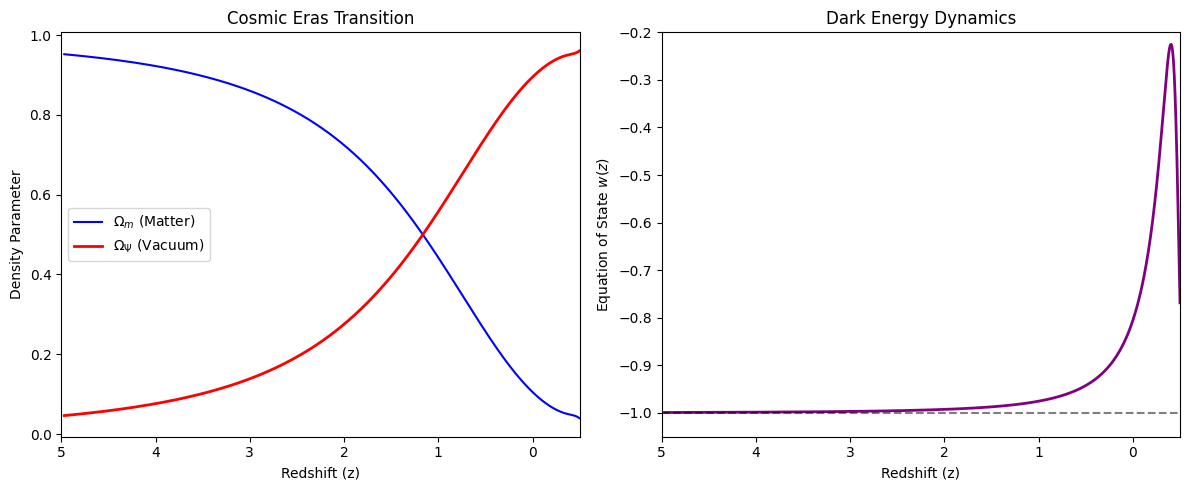

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. CONFIGURACIÓN DEL MODELO ---
Om_r0 = 1e-4   # Radiation
Om_m0 = 0.3    # Matter
alpha = -10.0  # Mass parameter (negative for symmetry breaking)
beta = 10.0    # Saturation parameter
target_DE = 0.7

# Potential setup
psi_min = np.sqrt(-alpha / (2*beta))
V_min_raw = alpha * psi_min**2 + beta * psi_min**4
V_shift = target_DE - V_min_raw

def Potential(psi): return alpha * psi**2 + beta * psi**4 + V_shift
def dV_dpsi(psi): return 2 * alpha * psi + 4 * beta * psi**3

# --- 2. ECUACIONES DE FRIEDMANN ---
def cosmic_dynamics(y, t):
    a, psi, pi = y 
    if a <= 1e-5: a = 1e-5
    rho_r = Om_r0 / a**4
    rho_m = Om_m0 / a**3
    rho_psi = 0.5 * pi**2 + Potential(psi)
    H = np.sqrt(np.abs(rho_r + rho_m + rho_psi))
    
    dadt = a * H
    dpsidt = pi
    dpidt = -3 * H * pi - dV_dpsi(psi)
    return [dadt, dpsidt, dpidt]

# --- 3. INTEGRACIÓN ---
t = np.linspace(0, 1.5, 1000)
sol = odeint(cosmic_dynamics, [1e-4, 0.1, 0.0], t)

a, psi, pi = sol[:, 0], sol[:, 1], sol[:, 2]
z = 1/a - 1
rho_r, rho_m = Om_r0 / a**4, Om_m0 / a**3
rho_psi = 0.5 * pi**2 + Potential(psi)
P_psi = 0.5 * pi**2 - Potential(psi)
w_psi = P_psi / rho_psi
rho_tot = rho_r + rho_m + rho_psi

# --- 4. VISUALIZACIÓN ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
mask = (z < 5) & (z > -0.5)

# Panel 1: Densities
ax1.plot(z[mask], (rho_m/rho_tot)[mask], label=r"$\Omega_m$ (Matter)", color='blue')
ax1.plot(z[mask], (rho_psi/rho_tot)[mask], label=r"$\Omega_\Psi$ (Vacuum)", color='red', lw=2)
ax1.set_xlim(5, -0.5); ax1.set_xlabel("Redshift (z)"); ax1.set_ylabel("Density Parameter")
ax1.legend(); ax1.set_title("Cosmic Eras Transition")

# Panel 2: Equation of State
ax2.plot(z[mask], w_psi[mask], color='purple', lw=2)
ax2.axhline(-1, color='black', ls='--', alpha=0.5, label="$\Lambda$ limit")
ax2.set_xlim(5, -0.5); ax2.set_ylim(-1.05, -0.2)
ax2.set_xlabel("Redshift (z)"); ax2.set_ylabel("Equation of State $w(z)$")
ax2.set_title("Dark Energy Dynamics")
plt.tight_layout()
plt.show()

## 3. Results & Interpretation
The simulation reveals two critical features of the **Dynamic Background**:

1.  **Natural Transition (Left Panel):** The model successfully recovers the standard cosmological history. At high redshifts ($z > 1$), matter dominates the energy budget, allowing for structure formation. As the universe expands, the vacuum field $\Psi$ takes over, becoming the dominant component at $z \approx 0.7$.
2.  **Thawing Quintessence (Right Panel):** Unlike a rigid Cosmological Constant ($w = -1$), the vacuum field exhibits **thawing dynamics**. It remains "frozen" at $w \approx -1$ during the early stages due to high Hubble friction, but as expansion slows down, the field begins to evolve, causing $w(z)$ to increase slightly.

## 4. Conclusion
The Dynamic Background provides a robust physical mechanism for **Dark Energy**. It is not a fine-tuned constant, but a dynamic result of the superfluid vacuum's state. The predicted deviation from $w = -1$ at low redshifts offers a clear, falsifiable signature for upcoming surveys like Euclid or DESI.